In [1]:
using Gadfly

In [2]:
n = 107

107

In [3]:
knots = map(k -> k/n, collect(1: n-1));

In [4]:
function V(x)
   0
end

V (generic function with 1 method)

In [5]:
function f(i,j,n)
    h = 1/n
    if i == j 
        2/h^2 + V(i/n)
    elseif abs(i-j) == 1
         -1/(h^2)
    else
        0
    end
end

f (generic function with 1 method)

In [6]:
M = [f(i,j,n) for i in 1:n-1 , j in 1:n-1];

In [7]:
using LinearAlgebra

In [8]:
e, X = eigen(M);

In [9]:
X[1,1]

0.004013532693253407

In [10]:
X[:,1]

106-element Vector{Float64}:
 0.004013532693253407
 0.00802360577130975
 0.012026762601117229
 0.016019552511343824
 0.019998533766813043
 0.02396027653523698
 0.027901365843688852
 0.03181840452226702
 0.035708016132413305
 0.03956684787736103
 0.043391573492203926
 0.047178896111095124
 0.05092555110910439
 ⋮
 0.0471788961111366
 0.04339157349224237
 0.0395668478773964
 0.03570801613244554
 0.03181840452229586
 0.02790136584371414
 0.023960276535258857
 0.019998533766831403
 0.01601955251135854
 0.012026762601128324
 0.008023605771317235
 0.004013532693257151

In [11]:
knots

106-element Vector{Float64}:
 0.009345794392523364
 0.018691588785046728
 0.028037383177570093
 0.037383177570093455
 0.04672897196261682
 0.056074766355140186
 0.06542056074766354
 0.07476635514018691
 0.08411214953271028
 0.09345794392523364
 0.102803738317757
 0.11214953271028037
 0.12149532710280374
 ⋮
 0.8878504672897196
 0.897196261682243
 0.9065420560747663
 0.9158878504672897
 0.9252336448598131
 0.9345794392523364
 0.9439252336448598
 0.9532710280373832
 0.9626168224299065
 0.9719626168224299
 0.9813084112149533
 0.9906542056074766

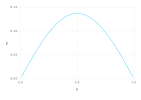

In [12]:
p1 = plot(x=knots, y=X[:,1],Geom.line)

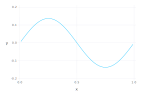

In [13]:
p2 = plot(x=knots, y=X[:,2],Geom.line)

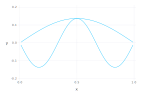

In [14]:
plot(layer(x=knots, y=X[:,1], Geom.line),
     layer(x=knots, y=X[:,3], Geom.line))

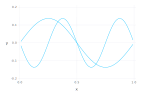

In [15]:
plot(layer(x=knots, y=X[:,2], Geom.line),
     layer(x=knots, y=X[:,4], Geom.line))
     

In [16]:
function smallest_eigen(n)
    first(eigen([f(i,j,n) for i in 1:n-1 , j in 1:n-1]))[1]
end

smallest_eigen (generic function with 1 method)

In [17]:
x = [i for i in 20:100]

81-element Vector{Int64}:
  20
  21
  22
  23
  24
  25
  26
  27
  28
  29
  30
  31
  32
   ⋮
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
 100

In [18]:
e1 = map(smallest_eigen, x)

81-element Vector{Float64}:
 9.849327523890679
 9.851211269437044
 9.852844259257381
 9.854269093563289
 9.855519697370255
 9.856623356903583
 9.857602219430646
 9.858474412248142
 9.859254887395764
 9.859956066367886
 9.860588337107401
 9.86116044077744
 9.86167977534069
 ⋮
 9.868579645750787
 9.868602290659336
 9.868624193181725
 9.868645385417462
 9.868665897748745
 9.868685758950994
 9.868704996295419
 9.868723635638393
 9.86874170150989
 9.86875921719707
 9.868776204814523
 9.86879268537808

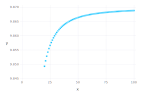

In [19]:
plot(x=x, y=e1)

In [20]:
x = [i for i in 1:length(e1)-1];

In [21]:
To show the convergence is linear, use the known limit (pi^2) and look at 
quotient

LoadError: UndefVarError: `To` not defined

In [22]:
d = [(e1[k+1] - pi^2)/(e1[k] - pi^2) for k in 1:length(e1)-1]

80-element Vector{Float64}:
 0.9070988334195705
 0.9112174124991241
 0.9149867393610271
 0.9184493819351182
 0.9216412673394654
 0.9245929284998738
 0.9273304768834834
 0.9298763764496069
 0.9322500561011041
 0.9344684074746542
 0.936546183436272
 0.9384963282551725
 0.9403302444440567
 ⋮
 0.977655264297451
 0.9779021316631872
 0.9781436040047465
 0.9783798563836159
 0.9786110572709712
 0.9788373664860034
 0.9790589353333513
 0.9792759132488805
 0.9794884421526274
 0.9796966550156593
 0.9799006847998726
 0.9801006548107282

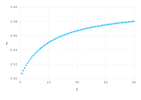

In [23]:
plot(x=x, y=d)